# CNN Experiments

We train CNNs on two feature maps (raw data and Fourier-transformed data), using 10-fold cross-validation to select hyperparameters.

## Contents
1. [Set-Up](#Set-Up)
2. [Data](#Data)
3. [Raw Data](#Raw-Data)
4. [Fourier Transform](#Fourier-Transform)

## Set-Up
- Download the [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) and place it in the current directory.

In [1]:
import numpy as np
import pandas as pd
import util

Using TensorFlow backend.


## Data
We first parse and normalize our dataset.

In [2]:
X, y, ids, chunks = util.parse_data()
X = X.reshape(X.shape[0], X.shape[1], 1)
classes = np.unique(y)

We split our data 80/20 train/test.

In [3]:
X_train, y_train, ids_train, X_test, y_test, ids_test = util.split_data(X, y, ids, seed=0)

We set up scoring.

In [4]:
scoring = util.get_scoring_metrics(classes)

## Raw Data

In [ ]:
r_cv_results, r_acc, r_f1_macro, r_f1_per_class, r_cm = util.evaluate_cnn(
    X_train, y_train, ids_train, X_test, y_test, classes, scoring, 'raw')

Train loss: 0.1745 - accuracy: 0.9272

In [6]:
r_cv_df = pd.DataFrame.from_dict(r_cv_results)
r_cv_df.to_csv('raw_cnn_cv_results.csv')
r_cv_df

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1_class_1,mean_test_f1_class_2,mean_test_f1_class_3,mean_test_f1_class_4,mean_test_f1_class_5,mean_test_f1_macro,mean_train_accuracy,...,std_test_f1_class_4,std_test_f1_class_5,std_test_f1_macro,std_train_accuracy,std_train_f1_class_1,std_train_f1_class_2,std_train_f1_class_3,std_train_f1_class_4,std_train_f1_class_5,std_train_f1_macro
0,53.803345,0.559204,0.722826,0.961601,0.452595,0.552209,0.816907,0.768401,0.710343,0.774251,...,0.063360,0.085057,0.047489,0.016005,0.002325,0.083146,0.094787,0.031874,0.021897,0.019586
1,62.680588,0.600108,0.741739,0.952045,0.580203,0.631250,0.780381,0.725820,0.733940,0.901196,...,0.049133,0.064685,0.022425,0.008003,0.005987,0.021356,0.023343,0.007577,0.008734,0.008321
2,65.814845,0.621961,0.756087,0.958195,0.631321,0.637801,0.792665,0.723849,0.748766,0.943273,...,0.041170,0.091823,0.031416,0.009037,0.002060,0.018994,0.014500,0.012334,0.014302,0.009081
3,67.391203,0.613099,0.750435,0.954782,0.655117,0.646732,0.765672,0.695630,0.743587,0.964215,...,0.051634,0.082109,0.029507,0.010502,0.000972,0.020173,0.022088,0.010068,0.010472,0.010668
4,53.465182,0.544257,0.735435,0.956547,0.422365,0.603437,0.841551,0.757749,0.716330,0.783418,...,0.047769,0.103476,0.035070,0.012634,0.003447,0.093979,0.026173,0.021860,0.018256,0.018421
5,62.820251,0.613120,0.743587,0.950453,0.577644,0.648012,0.768547,0.712608,0.731453,0.894831,...,0.063735,0.067863,0.026966,0.011176,0.000795,0.041037,0.016706,0.006512,0.012242,0.012337
6,65.157553,0.624796,0.750326,0.951775,0.645848,0.634518,0.771881,0.711212,0.743047,0.932114,...,0.066910,0.101037,0.026255,0.015261,0.009069,0.020380,0.022413,0.018222,0.025380,0.015200
7,66.794291,0.613432,0.750435,0.950436,0.620876,0.633026,0.789776,0.716024,0.742028,0.953056,...,0.063043,0.079898,0.021763,0.012282,0.002483,0.021039,0.024577,0.010487,0.013576,0.012240
8,53.675814,0.547386,0.724783,0.958352,0.426563,0.579235,0.831883,0.768997,0.713006,0.771171,...,0.064183,0.070653,0.036485,0.014084,0.004024,0.079945,0.048024,0.025704,0.023068,0.015771
9,63.229569,0.611703,0.734130,0.951922,0.560962,0.603852,0.779196,0.720727,0.723332,0.868080,...,0.053736,0.095246,0.031171,0.018549,0.001222,0.045997,0.023993,0.019107,0.025776,0.019916


In [7]:
print('Accuracy: ', r_acc)
print('Macro F1: ', r_f1_macro)
print('F1 per class: ', r_f1_per_class)

Accuracy:  0.7795652173913044
Macro F1:  0.7731901211314189
F1 per class:  [0.97383178 0.70540265 0.62207358 0.7752809  0.7893617 ]


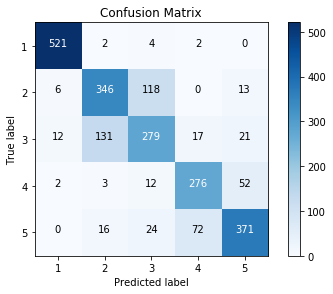

In [8]:
util.visualize_confusion_matrix(r_cm, classes)

## Fourier Transform

In [5]:
X_f_train = np.fft.rfft(X_train, axis=1).astype(float)
X_f_test = np.fft.rfft(X_test, axis=1).astype(float)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [ ]:
f_cv_results, f_acc, f_f1_macro, f_f1_per_class, f_cm = util.evaluate_cnn(
    X_f_train, y_train, ids_train, X_f_test, y_test, classes, scoring, 'fourier')

Train loss: 0.1008 - accuracy: 0.9585

In [7]:
f_cv_df = pd.DataFrame.from_dict(f_cv_results)
f_cv_df.to_csv('fourier_cnn_cv_results.csv')
f_cv_df

,mean_fit_time,mean_score_time,mean_test_accuracy,mean_test_f1_class_1,mean_test_f1_class_2,mean_test_f1_class_3,mean_test_f1_class_4,mean_test_f1_class_5,mean_test_f1_macro,mean_train_accuracy,...,std_test_f1_class_4,std_test_f1_class_5,std_test_f1_macro,std_train_accuracy,std_train_f1_class_1,std_train_f1_class_2,std_train_f1_class_3,std_train_f1_class_4,std_train_f1_class_5,std_train_f1_macro
0,48.786716,0.542343,0.704674,0.930591,0.487433,0.589426,0.779481,0.697637,0.696913,0.837609,...,0.057172,0.080977,0.023307,0.014507,0.009212,0.032586,0.019288,0.015037,0.024245,0.014214
1,58.131255,0.537378,0.727283,0.929117,0.560193,0.560849,0.821060,0.716636,0.717571,0.927476,...,0.046771,0.086644,0.031859,0.012059,0.016640,0.026886,0.029167,0.014462,0.012624,0.012523
2,57.759550,0.616245,0.720870,0.921936,0.546387,0.577497,0.813801,0.722214,0.716367,0.968080,...,0.048820,0.071311,0.031579,0.022726,0.011942,0.049904,0.033848,0.011773,0.013471,0.023266
3,49.356635,0.488237,0.702826,0.928101,0.490660,0.568947,0.785044,0.696686,0.693888,0.822524,...,0.048103,0.075781,0.026508,0.016125,0.012949,0.056699,0.035739,0.017450,0.017695,0.017750
4,58.160561,0.540230,0.729891,0.933609,0.531516,0.587190,0.834571,0.725333,0.722444,0.912246,...,0.042577,0.084264,0.028244,0.014633,0.009857,0.018893,0.025603,0.013155,0.014877,0.014478
5,57.954010,0.654688,0.740652,0.936450,0.583560,0.597656,0.822525,0.717792,0.731596,0.959372,...,0.036647,0.074445,0.023383,0.015879,0.001950,0.033681,0.039991,0.004413,0.008565,0.016159
6,49.061079,0.486985,0.680870,0.927642,0.442343,0.554452,0.751975,0.676703,0.670623,0.782114,...,0.058214,0.075610,0.030114,0.008623,0.006192,0.034838,0.031076,0.012422,0.019274,0.007852
7,58.752858,0.548066,0.722826,0.939574,0.479671,0.603308,0.827021,0.725085,0.714932,0.887271,...,0.043474,0.086440,0.029796,0.012474,0.003181,0.032072,0.023572,0.020052,0.019246,0.013069
8,59.195730,0.578497,0.737826,0.937642,0.535605,0.608180,0.830854,0.726859,0.727828,0.914420,...,0.044902,0.088844,0.034754,0.014576,0.004964,0.043481,0.023377,0.008289,0.011156,0.015532


In [8]:
print('Accuracy: ', f_acc)
print('Macro F1: ', f_f1_macro)
print('F1 per class: ', f_f1_per_class)

Accuracy:  0.7404347826086957
Macro F1:  0.7366267900877828
F1 per class:  [0.94139887 0.54655381 0.62535211 0.7994429  0.77038627]


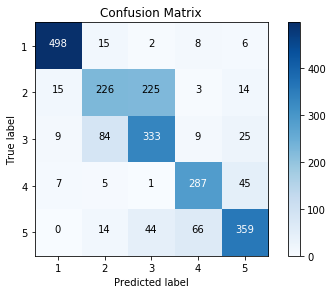

In [9]:
util.visualize_confusion_matrix(f_cm, classes)